<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Proyecto4x4_rangointercuart%C3%ADlico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compa√±√≠a YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los pr√≥ximos 4 a√±os. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforaci√≥n y adoptar un enfoque m√°s eficiente en la gesti√≥n financiera. La compa√±√≠a ha logrado reducir los tiempos de perforaci√≥n de aproximadamente un a√±o a 170 d√≠as, mediante mejoras t√©cnicas y operativas.

Este plan de transformaci√≥n busca posicionar a YPF como una empresa m√°s eficiente, rentable y alineada con las tendencias internacionales del sector energ√©tico, con una visi√≥n clara en el desarrollo del shale en Argentina.

**Modelado**

En la pre entrega 2, realizamos la transformaci√≥n de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en funci√≥n al an√°lisis exploratorio que features tener en consideraci√≥n para el modelado.

Como observamos anteriormente tanto la producci√≥n de petr√≥leo como la producci√≥n de gas son dos datos que queremos predecir para los pr√≥ximos 4 a√±os, sin embargo el an√°lisis estar√° centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales √°reas de permiso de concesi√≥n tanto para la producci√≥n de petr√≥leo como para la producci√≥n de gas.

As√≠ como tambi√©n tenemos que mencionar que el dataset est√° centrado √∫nicamente en la producci√≥n de lo no convencional, es decir, de aquella extracci√≥n que requiere tecnolog√≠as m√°s avanzadas, costosas o intensivas en recursos debido a las caracter√≠sticas del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producci√≥n de petr√≥leo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian seg√∫n el tipo de roca y suelen requerir t√©cnicas como la fractura hidr√°ulica (fracking) para su extracci√≥n. Mientras que el shale se extrae de la roca sedimentaria rica en materia org√°nica que act√∫a como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.

In [1]:
#descargamos todas las librer√≠as necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la funci√≥n head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                      1                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

   Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                       0                         0                      0   
1                       1                         0                      0   
2                       1                         0                      0   
3                       1                         0                      0   
4                       0                         1                      0   

   Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                                1                         0   
1                                1                         1   
2                                1                         1   
3                                1                         1   
4                                1                         1   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                         1                                                0   
1                         0                                                0   
2                         0                                                0   
3                         0                                                0   
4                         0                                                0   

   Area de permiso de concesion_AGUADA DEL CHA√ëAR  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Area de permiso de concesion_VALLE DEL RIO GRANDE  Produccion de Petroleo  \
0                                                  0                      32   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                      55   

   Produccion de Gas  Producci√≥n de agua  Profundidad   Mes  A√±o  
0                172                   0         3844  2025    1  
1                  0                   0         2827  2025    1  
2                  0                   0         2977  2025    1  
3                  0                   0         4092  2025    1  
4                  3                   0         4945  2025    1  

[5 rows x 47 columns]

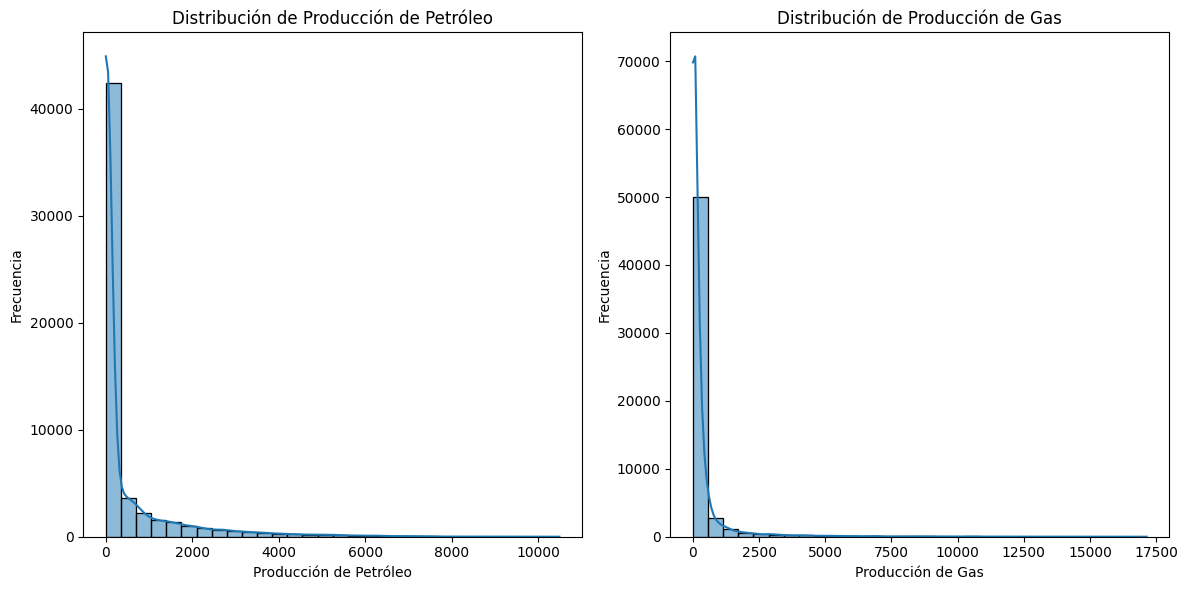

In [6]:
# Histograma para la columna Producci√≥n de Petroleo y Producci√≥n de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribuci√≥n de Producci√≥n de Petr√≥leo')
plt.xlabel('Producci√≥n de Petr√≥leo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribuci√≥n de Producci√≥n de Gas')
plt.xlabel('Producci√≥n de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [7]:
# Rango intercuatilico para produccion de petroleo y gas

# Calcular el Rango Intercuart√≠lico (IQR) para la Producci√≥n de Petr√≥leo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuart√≠lico para Producci√≥n de Petr√≥leo: {IQR_petroleo}")
print(f"Rango Intercuart√≠lico para Producci√≥n de Gas: {IQR_gas}")

Rango Intercuart√≠lico para Producci√≥n de Petr√≥leo: 343.75
Rango Intercuart√≠lico para Producci√≥n de Gas: 236.0


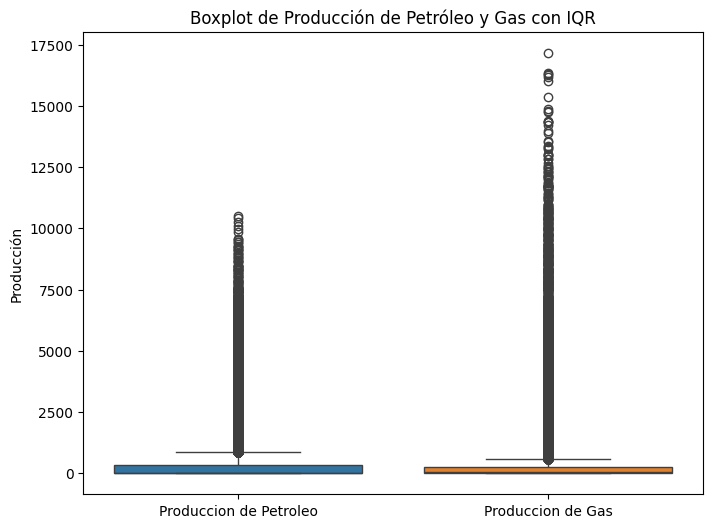

In [8]:
# Gr√°fico de rangos intercuartilicos anteriores

import matplotlib.pyplot as plt
# Crear un boxplot para visualizar los rangos intercuart√≠licos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producci√≥n de Petr√≥leo y Gas con IQR')
plt.ylabel('Producci√≥n')
plt.show()

In [9]:
#Calculamos el valor maximo y minimo de produccion de petroleo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor m√°ximo de producci√≥n de petr√≥leo: {max_produccion_petroleo}")
print(f"Valor m√≠nimo de producci√≥n de petr√≥leo: {min_produccion_petroleo}")
print(f"Valor m√°ximo de producci√≥n de gas: {max_produccion_gas}")
print(f"Valor m√≠nimo de producci√≥n de gas: {min_produccion_gas}")

Valor m√°ximo de producci√≥n de petr√≥leo: 10489.0
Valor m√≠nimo de producci√≥n de petr√≥leo: 0.0
Valor m√°ximo de producci√≥n de gas: 17143.0
Valor m√≠nimo de producci√≥n de gas: 0.0


In [10]:
#Calculamos la media para produccion de petroleo y produccion de gas con los valores nulos

print("Media para 'Produccion de Petroleo' incluyendo nulos:", Produccion_ypf['Produccion de Petroleo'].mean())
print("Media para 'Produccion de Gas' incluyendo nulos:", Produccion_ypf['Produccion de Gas'].mean())

Media para 'Produccion de Petroleo' incluyendo nulos: 474.9074054379808
Media para 'Produccion de Gas' incluyendo nulos: 341.5692863979581


In [11]:
media_petroleo_sin_ceros = Produccion_ypf['Produccion de Petroleo'][(Produccion_ypf['Produccion de Petroleo'] != 0)].mean()
media_gas_sin_ceros = Produccion_ypf['Produccion de Gas'][(Produccion_ypf['Produccion de Gas'] != 0)].mean()

print(f"Media para 'Produccion de Petroleo' sin ceros: {media_petroleo_sin_ceros}")
print(f"Media para 'Produccion de Gas' sin ceros: {media_gas_sin_ceros}")

Media para 'Produccion de Petroleo' sin ceros: 763.2773836993989
Media para 'Produccion de Gas' sin ceros: 451.33512893177505


**Filtrado de datos mediante IQR (Rango Intercuart√≠lico):**

El c√≥digo define una funci√≥n que identifica los valores dentro del rango intercuart√≠lico (entre el primer y tercer cuartil) de una columna, lo que permite eliminar outliers. Luego, se aplica este filtro a las columnas de producci√≥n de petr√≥leo y gas, conservando √∫nicamente las filas cuyos valores se encuentren dentro del IQR en ambas variables. Este filtrado mejora la calidad del dataset al reducir el impacto de valores extremos en los modelos predictivos.

In [13]:
# Funci√≥n para crear un filtro basado en el IQR
def filtrar_por_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    return columna.between(Q1, Q3)

# Aplicar filtro IQR a las columnas de inter√©s
filtro_petroleo = filtrar_por_iqr(Produccion_ypf['Produccion de Petroleo'])
filtro_gas = filtrar_por_iqr(Produccion_ypf['Produccion de Gas'])

# Conservar solo las filas donde ambas columnas est√©n dentro del IQR
Produccion_ypf_filtrado = Produccion_ypf[filtro_petroleo & filtro_gas]

In [14]:

Produccion_ypf_filtrado.head(20)


Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                     1.0                             0.0   
4                     0.0                             0.0   
8                     0.0                             0.0   
11                    0.0                             0.0   
12                    0.0                             0.0   
14                    1.0                             0.0   
15                    0.0                             0.0   
16                    1.0                             0.0   
17                    0.0                             0.0   
18                    0.0                             0.0   
19                    1.0                             0.0   
20                    1.0                             0.0   
22                    0.0                             0.0   
25                    1.0                             0.0   
27                    1.0                             0.0   
31                    0.0                             0.0   
32                    0.0                             0.0   
33                    1.0                             0.0   
35                    1.0                             0.0   
36                    0.0                             0.0   

    Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                      0.0                       0.0                    0.0   
4                      0.0                       1.0                    0.0   
8                      0.0                       1.0                    0.0   
11                     0.0                       1.0                    0.0   
12                     0.0                       1.0                    0.0   
14                     0.0                       0.0                    0.0   
15                     0.0                       1.0                    0.0   
16                     0.0                       0.0                    0.0   
17                     0.0                       1.0                    0.0   
18                     0.0                       1.0                    0.0   
19                     0.0                       0.0                    0.0   
20                     0.0                       0.0                    0.0   
22                     0.0                       1.0                    0.0   
25                     0.0                       0.0                    0.0   
27                     0.0                       0.0                    0.0   
31                     0.0                       1.0                    0.0   
32                     0.0                       1.0                    0.0   
33                     0.0                       0.0                    0.0   
35                     0.0                       0.0                    0.0   
36                     0.0                       1.0                    0.0   

    Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                               1.0                       0.0   
4                               1.0                       1.0   
8                               1.0                       1.0   
11                              1.0                       1.0   
12                              1.0                       1.0   
14                              1.0                       0.0   
15                              1.0                       1.0   
16                              1.0                       0.0   
17                              1.0                       1.0   
18                              1.0                       1.0   
19                              1.0                       0.0   
20                              1.0                       0.0   
22                              1.0                       1.0   
25                              1.0                       0.0   
27                              1.0                       0.0   
31                 

In [15]:
#Con la funci√≥n columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gas√≠fero',
 'Tipo de pozo_Inyecci√≥n de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrol√≠fero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de 

In [16]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyecci√≥n de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producci√≥n de agua',
    'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la funci√≥n drop eliminamos las columnas que consideramos que no son necesarias para el an√°lisis, en este caso solo dejamos las principales √°reas de permiso de concesi√≥n por producci√≥n de petr√≥leo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()


Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  Subtipo de recurso_SHALE  \
0                    1.0                       0.0                       0.0   
1                    0.0                       0.0                       1.0   
2                    0.0                       0.0                       1.0   
3                    0.0                       0.0                       1.0   
4                    0.0                       1.0                       1.0   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                       1.0                                              0.0   
1                       0.0                                              0.0   
2                       0.0                                              0.0   
3                       0.0                                              0.0   
4                       0.0                                              0.0   

   Area de permiso de concesion_BAJO DEL TORO    \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_BANDURRIA SUR  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Area de permiso de concesion_EL OREJANO  \
0                                      0.0   
1                                      1.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   Area de permiso de concesion_LA AMARGA CHICA  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_LA RIBERA BLOQUE I   ...  \
0                                               0.0  ...   
1                                               0.0  ...   
2                                               0.0  ...   
3                                               0.0  ...   
4                                               0.0  ...   

   Area de permiso de concesion_OCTOGONO  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Area de permiso de concesion_VALLE DEL RIO GRANDE  Produccion de Petroleo  \
0                                                0.0                    32.0   
1                                                0.0                     0.0   
2     

In [17]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en n√∫meros enteros

Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  \
0                          1                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         1   
...                      ...                       ...   
56413                      0                         0   
56414                      0                         1   
56415                      0                         1   
56416                      1                         0   
56417                      1                         0   

       Subtipo de recurso_SHALE  Subtipo de recurso_TIGHT  \
0                             0                         1   
1                             1                         0   
2                             1                         0   
3                             1                         0   
4                             1                         0   
...                         ...                       ...   
56413                         1                         0   
56414                         1                         0   
56415                         1                         0   
56416                         1                         0   
56417                         1                         0   

       Area de permiso de concesion_AGUADA DE LA ARENA  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
56413                                                0   
56414                                                0   
56415                                                0   
56416                                                0   
56417                                                0   

       Area de permiso de concesion_BAJO DEL TORO    \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
56413                                             0   
56414                                             0   
56415                                             0   
56416                                             0   
56417                                             0   

       Area de permiso de concesion_BANDURRIA SUR  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
56413                                           0   
56414                                           0   
56415                                           0   
56416                                           0   
56417                                           0   

       Area de permiso de concesion_EL OREJANO  \
0                                            0   
1                                            1   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
56413                                        0   
56414                                        0   
56415                                        0   
56416                                        0   
56417                         

In [18]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la funci√≥n columns para visualizar como qued√≥ el dataset con las columnas eliminadas, ahora son 29 columnas


['Tipo de pozo_Gas√≠fero',
 'Tipo de pozo_Petrol√≠fero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGR

### **Regresi√≥n Lineal**

La regresi√≥n lineal es un modelo estad√≠stico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o m√°s variables independientes (predictoras). En su forma m√°s simple (regresi√≥n lineal simple), ajusta una l√≠nea recta a los datos con la f√≥rmula:

ùë¶ = ùëé + ùëè ‚ãÖ ùë•

donde:

y es la variable dependiente,
x es la variable independiente,
a es la intersecci√≥n con el eje Y (intercepto),
b es la pendiente de la recta (coeficiente).

In [19]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petr√≥leo y Producci√≥n de gas


In [20]:
x = Produccion_ypf_filtrado.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [21]:
x.head()

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                     1.0                             0.0   
4                     0.0                             0.0   
8                     0.0                             0.0   
11                    0.0                             0.0   
12                    0.0                             0.0   

    Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                      0.0                       0.0                    0.0   
4                      0.0                       1.0                    0.0   
8                      0.0                       1.0                    0.0   
11                     0.0                       1.0                    0.0   
12                     0.0                       1.0                    0.0   

    Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                               1.0                       0.0   
4                               1.0                       1.0   
8                               1.0                       1.0   
11                              1.0                       1.0   
12                              1.0                       1.0   

    Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                        1.0                                              0.0   
4                        0.0                                              0.0   
8                        0.0                                              0.0   
11                       0.0                                              0.0   
12                       0.0                                              0.0   

    Area de permiso de concesion_AGUADA DEL CHA√ëAR  ...  \
0                                              0.0  ...   
4                                              0.0  ...   
8                                              0.0  ...   
11                                             0.0  ...   
12                                             0.0  ...   

    Area de permiso de concesion_NARAMBUENA  \
0                                       0.0   
4                                       0.0   
8                                       0.0   
11                                      0.0   
12                                      0.0   

    Area de permiso de concesion_OCTOGONO  \
0                                     0.0   
4                                     0.0   
8                                     0.0   
11                                    0.0   
12                                    0.0   

    Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                 0.0       
4                                                 0.0       
8                                                 0.0       
11                                                0.0       
12                                                0.0       

    Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                 0.0   
4                                                 0.0   
8                                                 0.0   
11                                                0.0   
12                                                0.0   

    Area de permiso de concesion_RIO NEUQUEN  \
0                                        0.0   
4                                        0.0   
8                                        0.0   
11                                       0.0   
12                                       0.0   

    Area de permiso de concesion_VALLE DEL RIO GRANDE  Producci√≥n de agua  \
0                                                 0.0                 0.0   
4                                                 0.0                 0.0   
8                                                 0.0                 4.0   
11                                                0.0          

In [22]:
lista_atributos = x.columns

In [23]:
y = Produccion_ypf_filtrado[['Produccion de Petroleo','Produccion de Gas']]

In [24]:
x, y =np.array(x), np.array(y)

In [25]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.844e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.945e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.069e+03, 2.025e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.808e+03, 2.024e+03,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.990e+03, 2.024e+03,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.113e+03, 2.024e+03,
        1.200e+01]])

In [26]:
y[:10]

array([[ 32., 172.],
       [ 55.,   3.],
       [ 10.,  22.],
       [  7.,  20.],
       [ 32.,  13.],
       [  0., 182.],
       [  4.,  18.],
       [  0., 120.],
       [ 36.,  16.],
       [  4.,  22.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relaci√≥n entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempe√±o del modelo con datos que no ha visto antes, simulando c√≥mo funcionar√° con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [27]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [29]:
x.shape

(20624, 45)

In [30]:
X_train.shape

(16499, 45)

In [31]:
y_test.shape

(4125, 2)

In [32]:
X_test.shape

(4125, 45)

In [33]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

### **An√°lisis de Boxplot**

El gr√°fico muestra la distribuci√≥n de los residuos del modelo para las variables de producci√≥n de petr√≥leo y gas. Ambos boxplots permiten identificar la dispersi√≥n, la presencia de outliers y la simetr√≠a de los errores. Se observa que los residuos presentan una concentraci√≥n alrededor del cero, aunque con una cantidad considerable de valores at√≠picos, especialmente en el caso del petr√≥leo. Esto sugiere que el modelo tiene un buen ajuste general, pero con algunas predicciones alejadas de los valores reales.



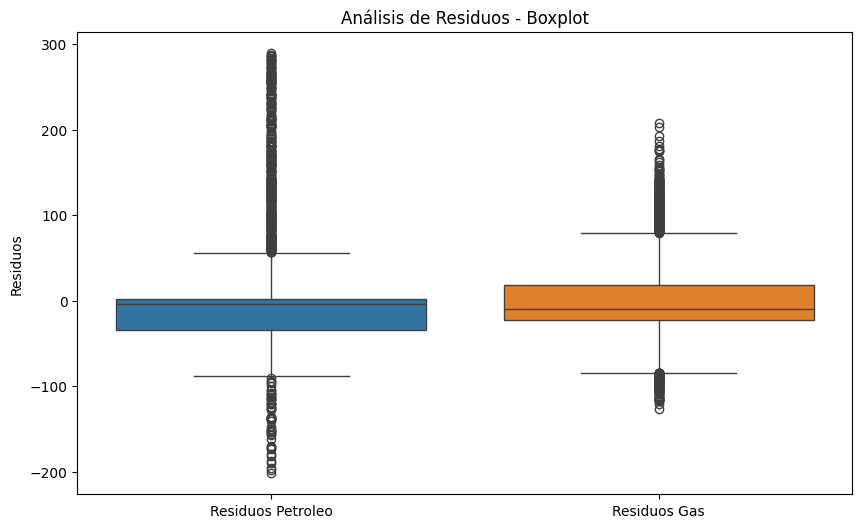

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('An√°lisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()

**Producci√≥n de Petr√≥leo Real vs. Predicha**

El gr√°fico de dispersi√≥n compara los valores reales de producci√≥n de petr√≥leo con las predicciones generadas por el modelo de Regresi√≥n Lineal. Idealmente, los puntos deber√≠an alinearse en una diagonal (y = x), lo que indicar√≠a una predicci√≥n perfecta. Sin embargo, se observa una dispersi√≥n significativa y patrones de agrupamiento en ciertos valores predichos, lo que sugiere que el modelo tiene dificultades para capturar la variabilidad completa de la producci√≥n real.

**Producci√≥n de Gas Real vs. Predicha**

Este gr√°fico de dispersi√≥n compara los valores reales de producci√≥n de gas con las predicciones realizadas por un modelo de regresi√≥n lineal. Se aprecia una dispersi√≥n notable y la presencia de bandas horizontales, lo que indica que el modelo tiende a predecir valores concentrados en ciertos rangos fijos, sin capturar adecuadamente la variabilidad de los datos reales. Esto sugiere limitaciones en la capacidad predictiva del modelo lineal para este problema.

**Distribuci√≥n de los Errores de Predicci√≥n**

El gr√°fico muestra la distribuci√≥n de los errores de predicci√≥n para los modelos aplicados a la producci√≥n de petr√≥leo y gas. En ambos casos, los errores se concentran alrededor del cero, lo cual es deseable, aunque con una ligera asimetr√≠a y la presencia de outliers. La curva de densidad sugiere que los errores del modelo de gas presentan una distribuci√≥n m√°s suave, mientras que los del petr√≥leo muestran mayor dispersi√≥n y picos an√≥malos, lo que podr√≠a indicar sobreajuste o errores sistem√°ticos en ciertos rangos.

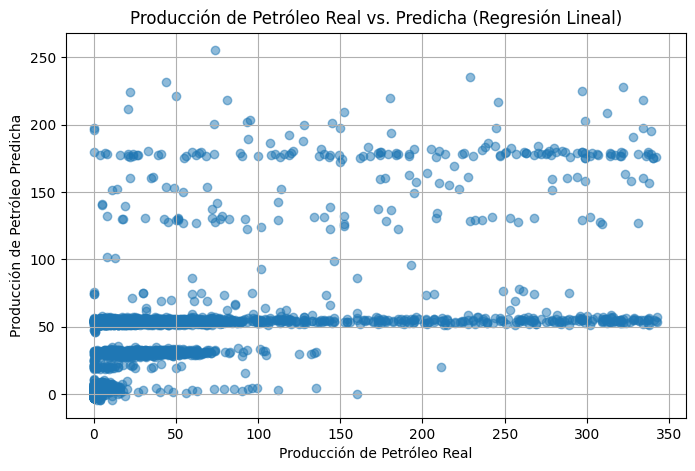

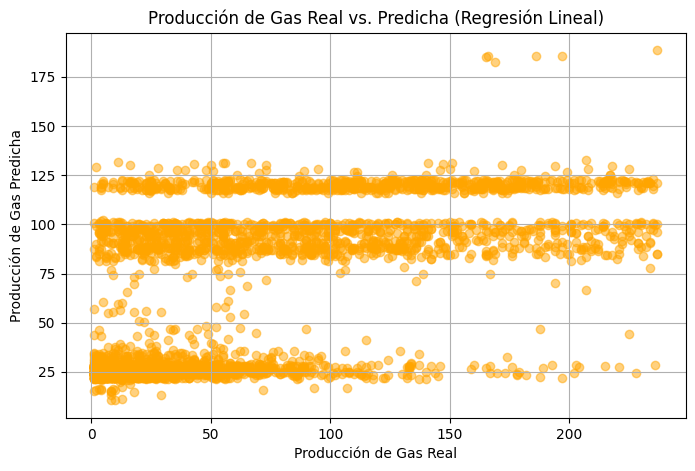

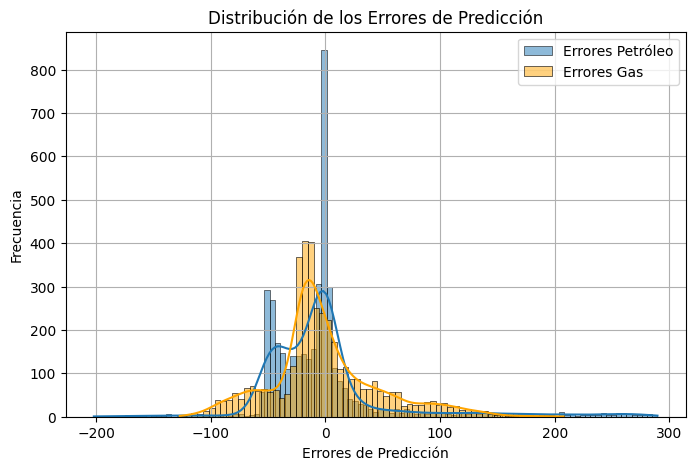

In [61]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producci√≥n de Petr√≥leo Real')
plt.ylabel('Producci√≥n de Petr√≥leo Predicha')
plt.title('Producci√≥n de Petr√≥leo Real vs. Predicha (Regresi√≥n Lineal)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producci√≥n de Gas Real')
plt.ylabel('Producci√≥n de Gas Predicha')
plt.title('Producci√≥n de Gas Real vs. Predicha (Regresi√≥n Lineal)')
plt.grid(True)
plt.show()

# Tambi√©n puedes visualizar la distribuci√≥n de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petr√≥leo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicci√≥n')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de los Errores de Predicci√≥n')
plt.legend()
plt.grid(True)
plt.show()


### **Random Forest**

Random Forest es un modelo de aprendizaje supervisado basado en un conjunto de √°rboles de decisi√≥n. Combina m√∫ltiples √°rboles para mejorar la precisi√≥n y reducir el sobreajuste. Es robusto, maneja bien grandes vol√∫menes de datos y es ideal para capturar relaciones no lineales entre variables.

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [38]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [39]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred


array([[ 17.3  ,  14.25 ],
       [ 18.825, 111.5  ],
       [ 27.55 , 125.025],
       ...,
       [  0.15 ,  81.95 ],
       [ 22.05 ,  16.1  ],
       [  0.7  ,  80.625]])

**Error Absoluto Medio (MAE) - Random Forest:**

El modelo Random Forest aplicado a la predicci√≥n de producci√≥n de petr√≥leo y gas present√≥ un MAE de 28.99, lo que indica que, en promedio, las predicciones se desv√≠an aproximadamente 29 unidades del valor real. Este valor brinda una medida clara y directa del desempe√±o del modelo en t√©rminos de precisi√≥n, siendo √∫til para evaluar su capacidad de generalizaci√≥n.

In [41]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

28.999415151515162

In [42]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: inf%


<ipython-input-42-603633143>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


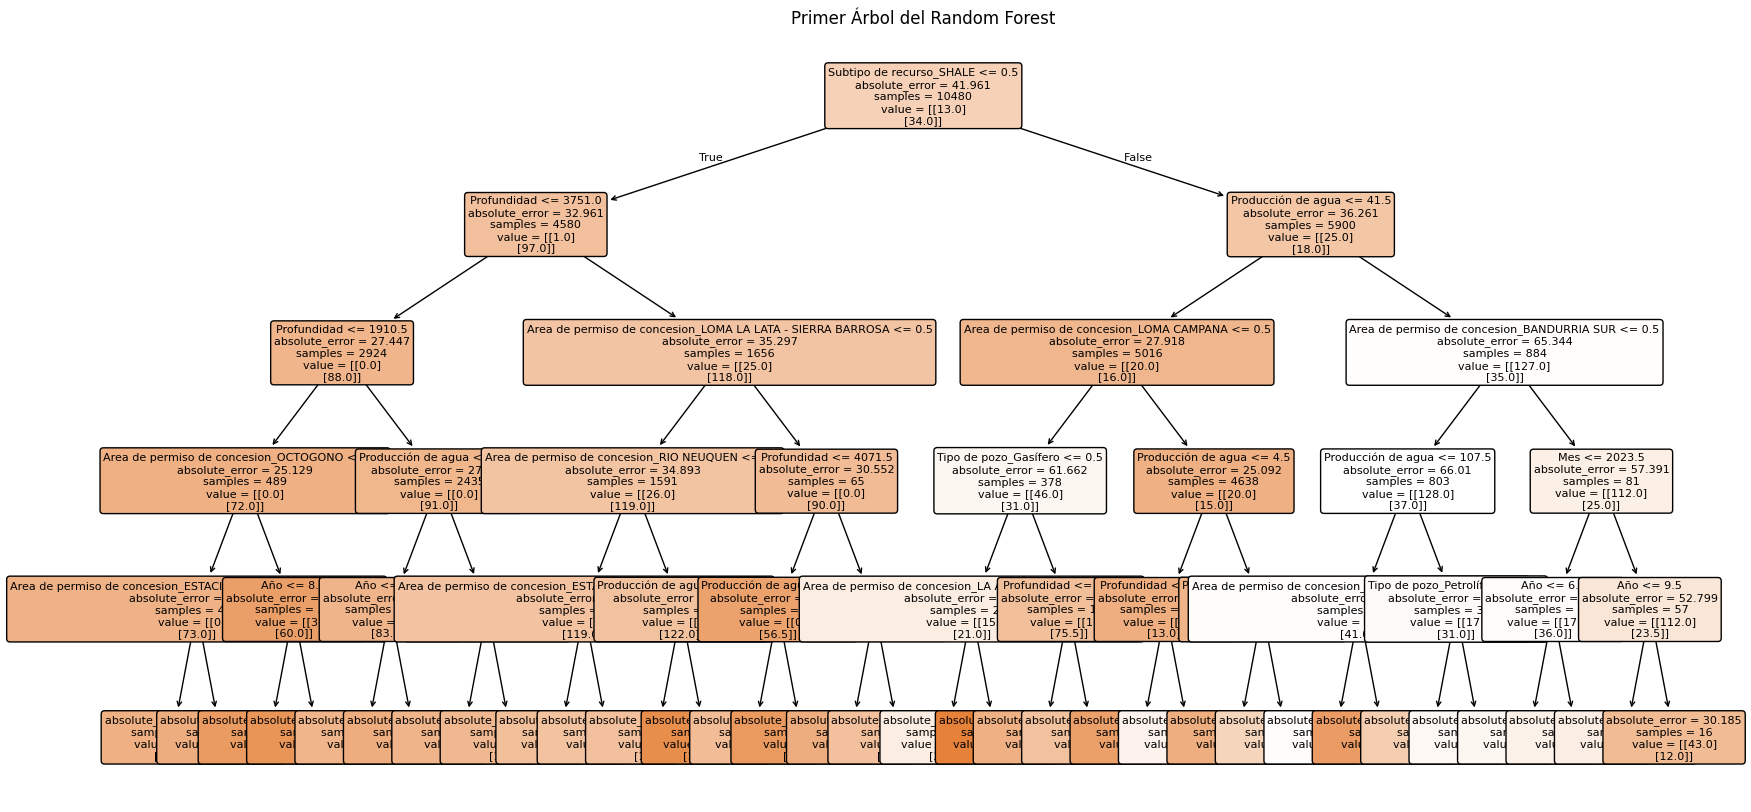

In [43]:
#Gr√°fico de √°rbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

# Asumo que ya tienes un modelo de RandomForestRegressor entrenado llamado 'regresor'
# y que 'lista_atributos' contiene los nombres de las caracter√≠sticas.

# Aseg√∫rate de que el modelo es un RandomForestRegressor
if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer √°rbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Aseg√∫rate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer √Årbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")

### **Support Vector Machine**

SVM es un algoritmo de aprendizaje supervisado que busca encontrar el hiperplano √≥ptimo que separa los datos de distintas clases (o ajusta una funci√≥n en regresi√≥n) maximizando el margen entre los puntos m√°s cercanos. Es eficaz en espacios de alta dimensi√≥n y especialmente √∫til cuando existe una clara separaci√≥n entre clases o patrones.

In [44]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [45]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [46]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [47]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[14.5947956 , 34.40914382],
       [25.81876104, 34.82613575],
       [25.82800622, 34.82446995],
       ...,
       [11.37949073, 34.3005936 ],
       [15.72471434, 34.44782632],
       [-0.59301535, 33.94742457]])

El modelo SVM arroj√≥ un MAE de 39.79, lo que indica que las predicciones difieren en promedio casi 40 unidades respecto a los valores reales. Este valor sugiere que, en este caso, el rendimiento del modelo fue menos preciso que otros enfoques,

In [48]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

39.78669041775291

**Producci√≥n de Petr√≥leo Real vs. Predicha (SVR)**

El gr√°fico de dispersi√≥n muestra la relaci√≥n entre los valores reales de producci√≥n de petr√≥leo y las predicciones generadas por un modelo Support Vector Regression (SVR). Se observa que muchas predicciones se agrupan en ciertos niveles fijos, lo que indica una limitada capacidad del modelo para capturar la variabilidad del dato real. Esto se alinea con el MAE elevado (39.79), sugiriendo que el modelo no logra generalizar adecuadamente en este contexto.

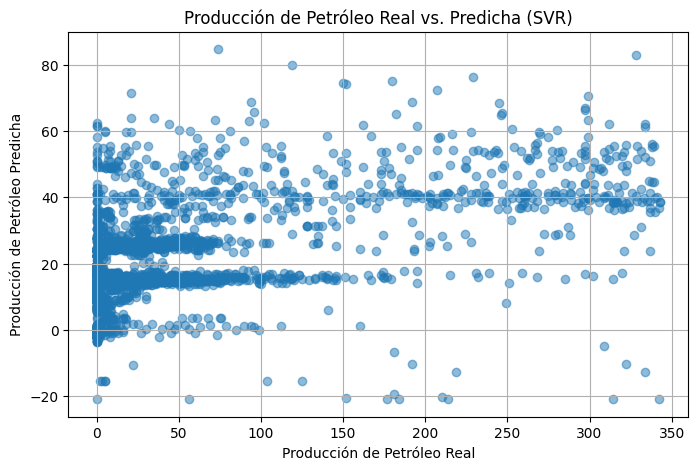

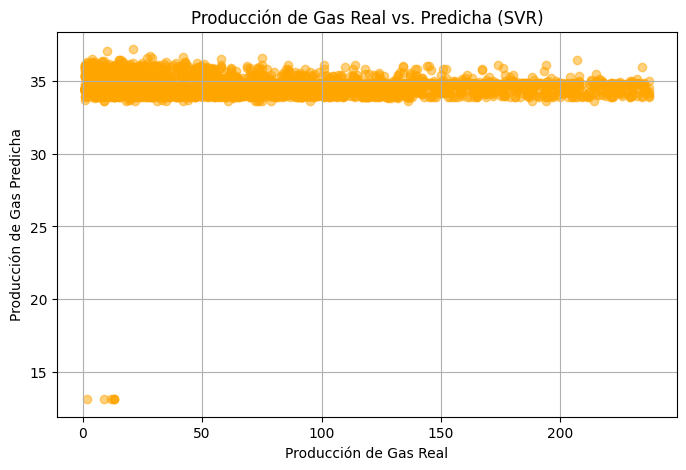

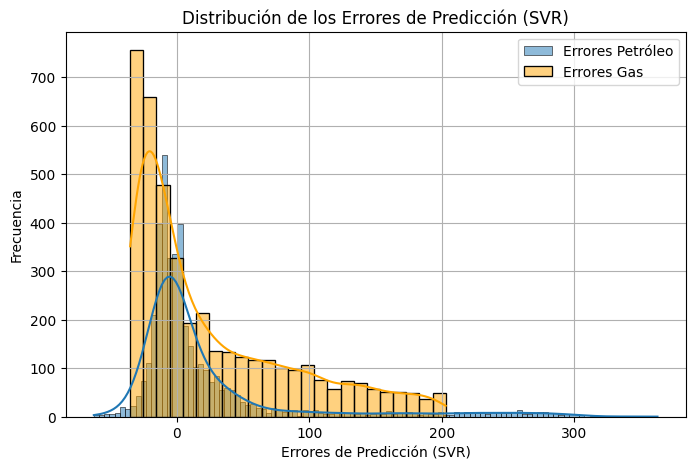

In [62]:
# Gr√°fico support vector machine

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producci√≥n de Petr√≥leo Real')
plt.ylabel('Producci√≥n de Petr√≥leo Predicha')
plt.title('Producci√≥n de Petr√≥leo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producci√≥n de Gas Real')
plt.ylabel('Producci√≥n de Gas Predicha')
plt.title('Producci√≥n de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Tambi√©n puedes visualizar la distribuci√≥n de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petr√≥leo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicci√≥n (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de los Errores de Predicci√≥n (SVR)')
plt.legend()
plt.grid(True)
plt.show()

### **XGBoost**

XGBoost es un algoritmo de aprendizaje supervisado basado en √°rboles de decisi√≥n, dise√±ado para optimizar el rendimiento y la velocidad en tareas de clasificaci√≥n y regresi√≥n. Utiliza boosting, que combina m√∫ltiples √°rboles d√©biles para crear un modelo fuerte, manejando bien datos grandes y complejos con alta precisi√≥n.

In [50]:
from xgboost import XGBRegressor

In [51]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresi√≥n
    random_state=42
)

In [52]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
y_pred_xgb = modelo_xgb.predict(X_test)

El modelo XGBoost obtuvo un MAE de 24.05, lo que indica que, en promedio, las predicciones se desv√≠an del valor real en aproximadamente 24 unidades. El RMSE de 39.33 refleja que los errores grandes tienen un peso mayor, mostrando cierta variabilidad en las predicciones. Un R¬≤ de 0.64 significa que el modelo explica alrededor del 64% de la variabilidad de los datos, evidenciando un buen ajuste pero con margen para mejorar.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")


MAE: 24.05456789900532
RMSE: 39.32537157450095
R¬≤: 0.641821690232698


### **Optimizaci√≥n: Gridsearch**

GridSearch es una t√©cnica de optimizaci√≥n que busca autom√°ticamente la mejor combinaci√≥n de hiperpar√°metros para un modelo, evaluando exhaustivamente todas las combinaciones posibles dentro de un rango definido. Esto ayuda a mejorar el rendimiento del modelo al encontrar los par√°metros que maximizan su precisi√≥n o minimizan el error.

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores par√°metros:", grid_search.best_params_)

Mejores par√°metros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}


In [56]:
best_model = grid_search.best_estimator_

Al aplicar GridSearch, el MAE disminuy√≥ a 20.59 desde 24.05, lo que indica que las predicciones son m√°s precisas en promedio, con un error absoluto menor. El RMSE tambi√©n mejor√≥ ligeramente, bajando a 38.44 desde 39.33, mostrando una reducci√≥n en la magnitud de errores grandes. Adem√°s, el R¬≤ aument√≥ a 0.66 desde 0.64, reflejando un mejor ajuste del modelo y una mayor capacidad para explicar la variabilidad de los datos. En conjunto, GridSearch optimiz√≥ el modelo XGBoost, logrando predicciones m√°s precisas y consistentes.

In [57]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

MAE: 20.59099566229523
RMSE: 38.43533129728304
R¬≤: 0.6613035947283906


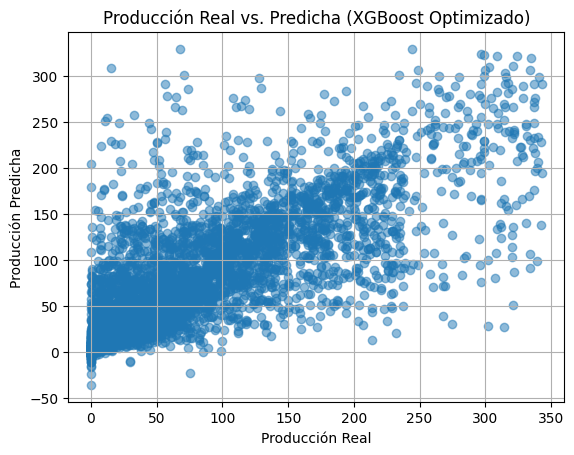

In [58]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producci√≥n Real")
plt.ylabel("Producci√≥n Predicha")
plt.title("Producci√≥n Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

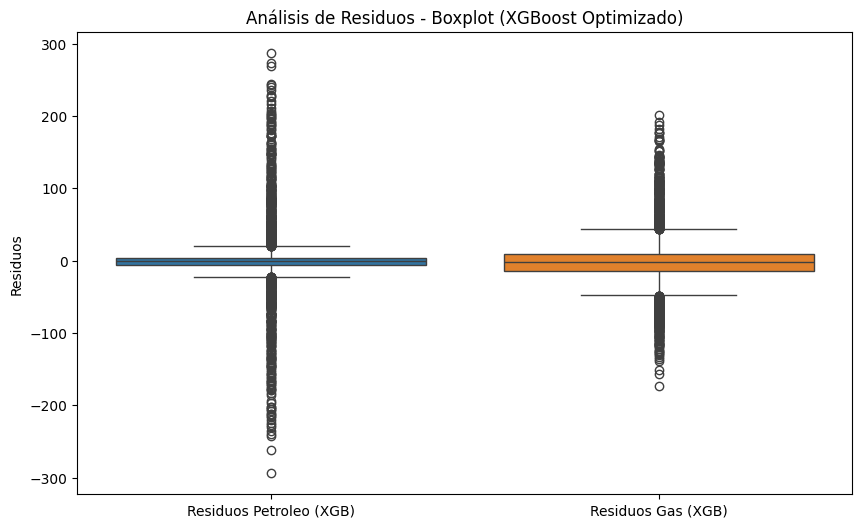

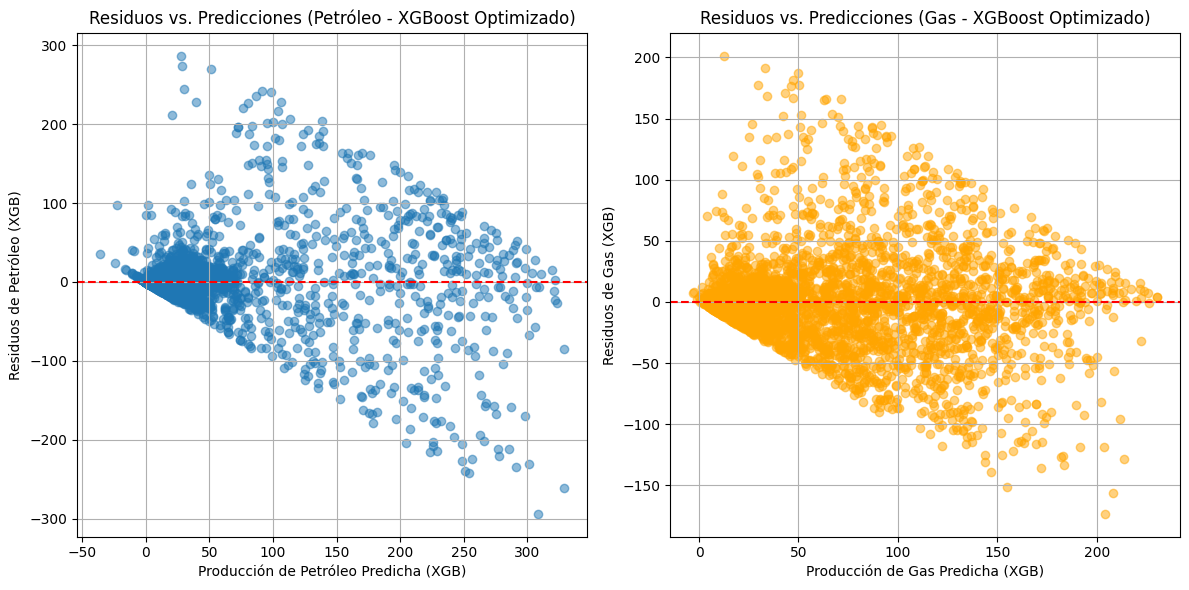

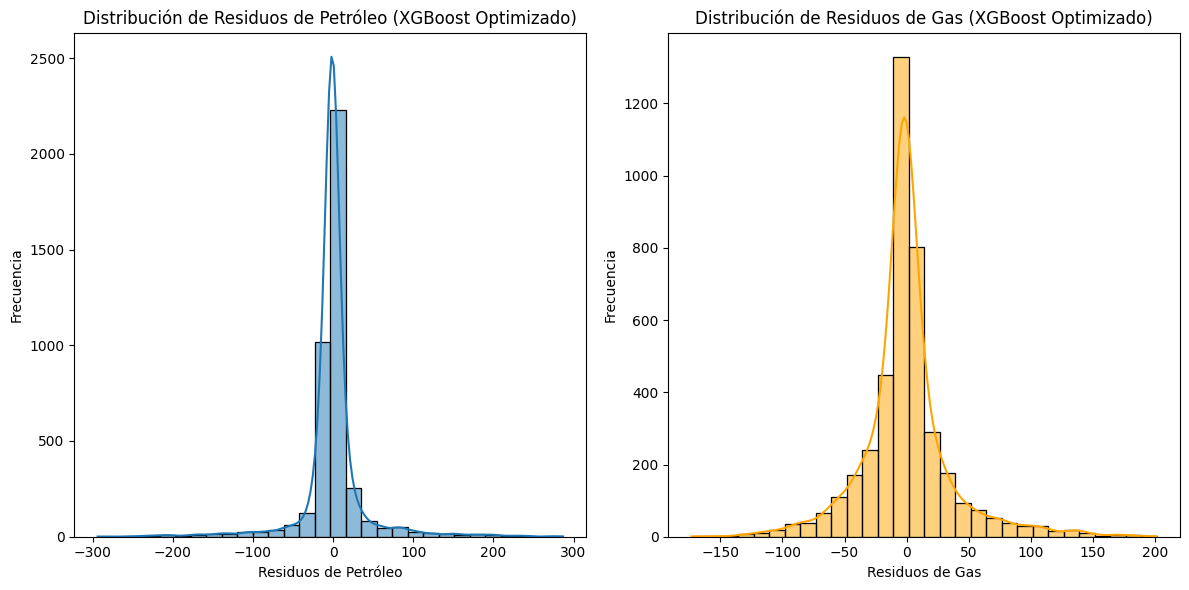

In [59]:
# Gr√°fico plot de residuos
import pandas as pd
import matplotlib.pyplot as plt
# Calcular los residuos del modelo XGBoost optimizado
residuals_xgb = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_xgb_df = pd.DataFrame(residuals_xgb, columns=['Residuos Petroleo (XGB)', 'Residuos Gas (XGB)'])

# Crear boxplots para los residuos del modelo XGBoost
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_xgb_df)
plt.title('An√°lisis de Residuos - Boxplot (XGBoost Optimizado)')
plt.ylabel('Residuos')
plt.show()

# Graficar los residuos frente a los valores predichos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_xgb[:, 0], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producci√≥n de Petr√≥leo Predicha (XGB)')
plt.ylabel('Residuos de Petr√≥leo (XGB)')
plt.title('Residuos vs. Predicciones (Petr√≥leo - XGBoost Optimizado)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_xgb[:, 1], alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producci√≥n de Gas Predicha (XGB)')
plt.ylabel('Residuos de Gas (XGB)')
plt.title('Residuos vs. Predicciones (Gas - XGBoost Optimizado)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Histograma de los residuos para ver su distribuci√≥n
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_xgb[:, 0], kde=True, bins=30)
plt.title('Distribuci√≥n de Residuos de Petr√≥leo (XGBoost Optimizado)')
plt.xlabel('Residuos de Petr√≥leo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb[:, 1], kde=True, bins=30, color='orange')
plt.title('Distribuci√≥n de Residuos de Gas (XGBoost Optimizado)')
plt.xlabel('Residuos de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()